来自文档[https://www.osgeo.cn/networkx/tutorial.html#creating-a-graph](https://www.osgeo.cn/networkx/tutorial.html#creating-a-graph)

### 创建图形
根据定义，a Graph 是一组节点（顶点）以及已标识的节点对（称为边、链接等）。在NetworkX中，节点可以是任何可哈希对象，例如文本字符串、图像、XML对象、另一个图形、自定义节点对象等。
>Python 的 None 对象不应用作节点，因为它确定是否在许多函数中分配了可选函数参数。

In [2]:
import networkx as nx
import matplotlib.pyplot as plt  
%matplotlib notebook
G = nx.Graph()

### 结点
图 G 可以通过多种方式生长。NetworkX包括许多图形生成器功能和以多种格式读取和写入图形的工具。我们先来看看简单的操作。您可以一次添加一个节点，

<IPython.core.display.Javascript object>


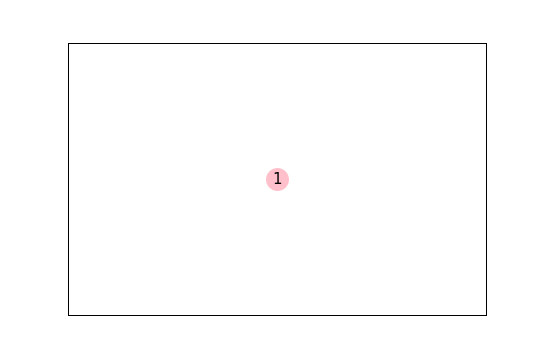

In [127]:
G.add_node(1)
nx.draw_networkx(G,node_color='pink')

或者添加节点列表

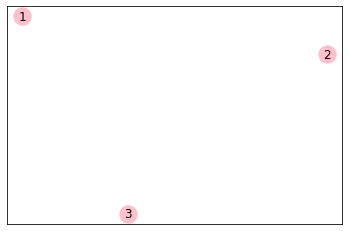

In [57]:
G.add_nodes_from([2, 3])
nx.draw_networkx(G,node_color='pink')

或者添加节点的任何iterable容器。如果容器生成两个元组（node，node-attribute-dict），也可以添加节点和节点属性。下面将进一步讨论节点属性。

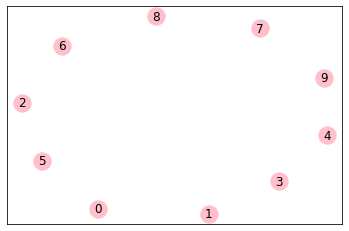

In [58]:
H = nx.path_graph(10)
G.add_nodes_from(H)
nx.draw_networkx(G,node_color='pink')

注意 G 现在包含的节点 H 作为节点 G . 相反，您可以使用图表 H 作为一个节点 G .

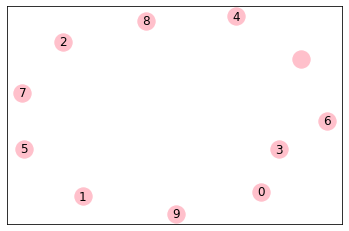

In [59]:
G.add_node(H)
nx.draw_networkx(G,node_color='pink')

图 G 现在包含 H 作为节点。这种灵活性非常强大，因为它允许图形、文件图形、函数图形等等。值得考虑如何构造应用程序，使节点成为有用的实体。当然，在 G 如果您愿意的话，还可以使用一个由标识符为节点信息键入的独立字典。
>如果散列值依赖于节点对象的内容，则不应更改该对象。


### 边
G 也可以通过一次添加一个边来生长，

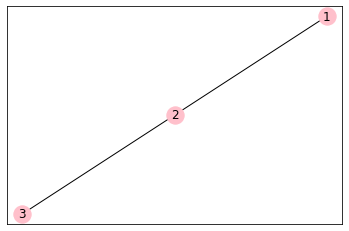

In [60]:
G.clear()
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)   # 解压元组
nx.draw_networkx(G,node_color='pink')

或者添加边列表

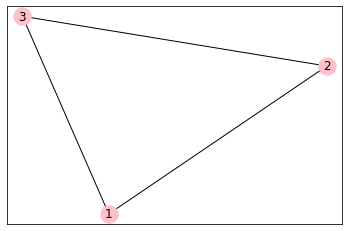

In [61]:
G.add_edges_from([(1, 2), (1, 3)])
nx.draw_networkx(G,node_color='pink')

或者通过添加任何边的重新启动。ebunch是边元组的任何iterable容器。边元组可以是节点的2元组，也可以是2个节点后跟边属性字典的3元组，例如（2，3，{'weight'：3.1415}）。下面将进一步讨论边缘属性 

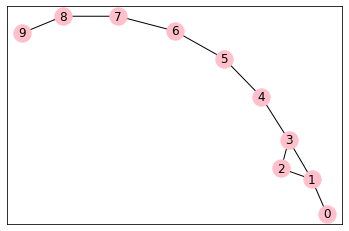

In [62]:
G.add_edges_from(H.edges)
nx.draw_networkx(G,node_color='pink')

该语法清除节点

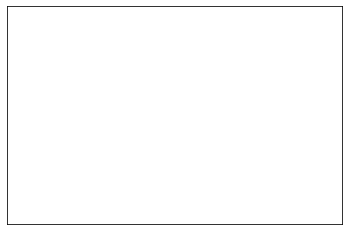

In [75]:
G.clear()
nx.draw_networkx(G,node_color='pink')

我们添加新的节点/边缘，NetworkX会悄悄地忽略已经存在的任何节点/边缘。

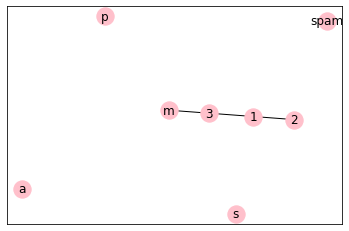

In [76]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # 添加一个节点spam
G.add_nodes_from("spam")  # 添加s p a m四个节点
G.add_edge(3, 'm')
nx.draw_networkx(G,node_color='pink')

在这个阶段，图表 G 由8个节点和3个边组成，如下所示：

In [65]:
print(G.number_of_nodes())

print(G.number_of_edges())

8
3


我们可以检查节点和边缘。四个基本图形属性有助于报告： `G.nodes` ， `G.edges` ， `G.adj` 和 `G.degree` . 这些设置类似于图中`节点`、`边`、`相邻`和`节点度数`的视图。它们为图形结构提供了一个不断更新的只读视图。它们也是类似dict的，因为您可以通过视图查找节点和边缘数据属性，并使用方法迭代数据属性。 `.items()` ， `.data('span')` . 如果您想要一个特定的容器类型而不是视图，您可以指定一个。这里我们使用列表，尽管集合、dict、元组和其他容器在其他上下文中可能更好。

In [67]:
print(list(G.nodes))

print(list(G.edges))

print(list(G.adj[1]))  # or list(G.neighbors(1))

print(list(G.neighbors(1)))

print(G.degree[1])  # the number of edges incident to 1

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
[2, 3]
2


可以指定使用nbunch报告所有节点子集的边和度数。nbunch是：None（表示所有节点）、node或iterable容器（节点本身不是图中的节点）。

In [68]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [73]:
G.degree([2, 3])

DegreeView({2: 1, 1: 2})

可以用与添加类似的方式从图形中删除节点和边，只要把add改成remove。使用方法 `Graph.remove_node()` ， `Graph.remove_nodes_from()` ， `Graph.remove_edge()` 和 `Graph.remove_edges_from()` ，例如

[1, 3, 'spam']


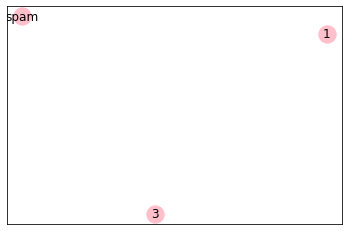

In [77]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))

G.remove_edge(1, 3)
nx.draw_networkx(G,node_color='pink')

通过实例化其中一个图形类来创建图形结构时，可以使用多种格式指定数据。

In [79]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
print(list(H.edges()))

edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
print(list(H.edges()))

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]


### 节点和边
您可能会注意到节点和边没有指定为networkx对象。这使您可以自由地将有意义的项用作节点和边。最常见的选择是数字或字符串，但是节点可以是任何可哈希对象（除了 `None` ）并且边缘可以与任何对象关联 `x` 使用 `G.add_edge(n1, n2, object=x)`

作为一个例子，` n1` 和 `n2` 可能是来自RCSB蛋白质数据库的蛋白质对象，以及 `x` 可以参考出版物的XML记录，该记录详细描述了它们交互的实验观察结果。

我们发现这种能力非常有用，但是如果不熟悉Python，它的滥用会导致意想不到的意外。如果有疑问，请考虑使用 c`onvert_node_labels_to_integers()` 以获得更传统的带有整数标签的图形。

#### 边缘和邻居
除了视图 `Graph.edges()` 和 `Graph.adj()` ，可以使用下标表示法访问边和邻居。

{2: {}}
{}
{}


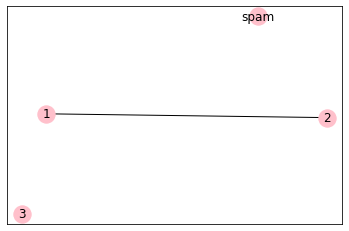

In [80]:
print(G[1])  # same as G.adj[1]

print(G[1][2])

print(G.edges[1, 2])
nx.draw_networkx(G,node_color='pink')

如果边已经存在，可以使用下标表示法获取/设置边的属性。

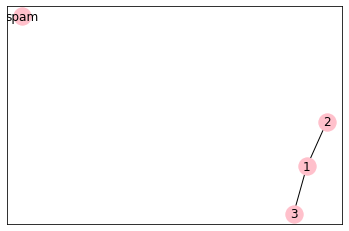

In [84]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
nx.draw_networkx(G,node_color='pink')

使用 `G.adjacency()` 或 `G.adj.items()` . 注意，对于无向图，邻接迭代可以看到每个边两次。

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


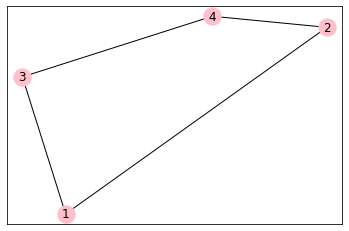

In [87]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")
nx.draw_networkx(FG,node_color='pink')

使用边缘属性可以方便地访问所有边缘

In [88]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


### 向图形、节点和边添加属性
诸如权重、标签、颜色或任何您喜欢的python对象等属性都可以附加到图形、节点或边上。

每个图、节点和边都可以在关联的属性字典中保存键/值属性对（键必须是可哈希的）。默认情况下，这些属性为空，但可以使用 `add_edge` ， `add_node` 或直接操作命名的属性字典 `G.graph `， `G.nodes` 和 `G.edges` 对于图 G .

#### 图形属性

{'day': 'Friday'}


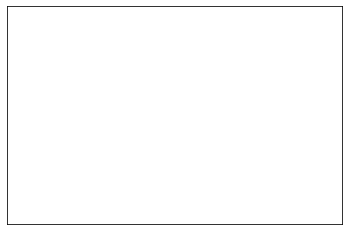

In [92]:
G = nx.Graph(day="Friday")
print(G.graph)
nx.draw_networkx(G,node_color='pink')

或者您可以稍后修改属性

In [93]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

#### 节点属性
使用添加节点属性 `add_node()` ， `add_nodes_from()` 或 `G.nodes`

{'time': '5pm', 'room': 714}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]


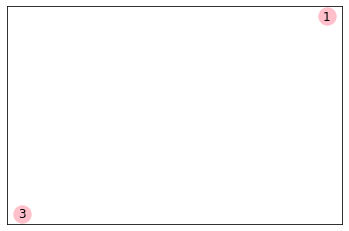

In [95]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])

G.nodes[1]['room'] = 714
print(G.nodes.data())
nx.draw_networkx(G,node_color='pink')

请注意，将节点添加到 `G.nodes` 不将其添加到图表中，使用 `G.add_node()` 添加新节点。同样适用于边缘。

### 边缘属性
使用添加/更改边缘属性 `add_edge()` ， `add_edges_from()` 或下标符号。

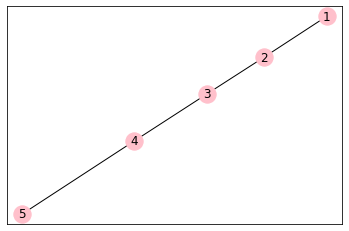

In [101]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
nx.draw_networkx(G,node_color='pink')

特殊属性 `weight` 应该是数字，因为它被需要加权边缘的算法使用。

### 有向图
这个 `DiGraph` 类提供特定于定向边的附加属性，例如， `DiGraph.out_edges()` ， `DiGraph.in_degree() `， `DiGraph.predecessors()` ， `DiGraph.successors()` 等。为了使算法能够轻松地与两个类一起工作，有向版本的` neighbors()` 等于` successors(`) 虽然 `degree` 报告 `in_degree` 和 `out_degre`e 尽管有时会觉得不一致。

0.5
1.25
[2]
[2]


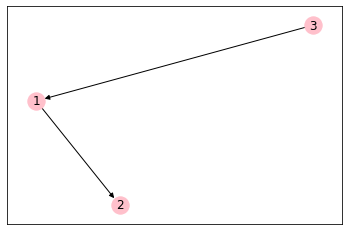

In [103]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))

print(DG.degree(1, weight='weight'))

print(list(DG.successors(1)))

print(list(DG.neighbors(1)))
nx.draw_networkx(DG,node_color='pink')

有些算法只适用于有向图，而另一些算法不适用于有向图。实际上，将有向图和无向图集中在一起的趋势是危险的。如果要将有向图视为某些度量的无向图，则应该使用 `Graph.to_undirected()` 或下面的方式。

In [104]:
H = nx.Graph(G)  # convert G to undirected graph

### 多重图
NetworkX为允许任意节点对之间存在多个边的图形提供类。这个 `MultiGraph` 和` MultiDiGraph` 类允许您两次添加相同的边缘，可能使用不同的边缘数据。这对某些应用程序来说可能很强大，但许多算法在此类图上没有很好的定义。如果结果定义明确，例如： `MultiGraph.degree()` 我们提供功能。否则，您应该以一种使测量定义良好的方式转换为标准图。

{1: 1.25, 2: 1.75, 3: 0.5}
[1, 2, 3]


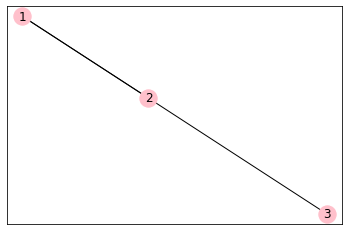

In [105]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print(dict(MG.degree(weight='weight')))

GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

print(nx.shortest_path(GG, 1, 3))
nx.draw_networkx(MG,node_color='pink')

### 图形生成器和图形操作
除了逐节点或逐边构造图外，还可以通过
1. 应用经典图形操作，例如：
```python
subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
to_undirected(G) - return an undirected representation of G
to_directed(G)   - return a directed representation of G
```
2. 调用一个经典的小图，例如，
```python
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()
```
3. 对经典图形使用（构造）生成器，例如，
```python
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)
```
4. 使用随机图生成器，例如，
```python
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)
```
5. 使用常用的图形格式读取存储在文件中的图形，如边列表、邻接列表、gml、graphml、pickle、leda等。
```python
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")
```
一些具有大输出的函数迭代（节点、值）2元组。这些很容易存储在 `dict` 结构，如果你愿意的话

In [106]:
sp = dict(nx.all_pairs_shortest_path(G))
print(sp[3])


{3: [3], 4: [3, 4], 2: [3, 2], 5: [3, 4, 5], 1: [3, 2, 1]}


### 图形绘制
networkx主要不是一个图形绘制包，而是一个带有matplotlib的基本绘图，以及一个使用开源graphviz软件包的接口。这些是 `networkx.drawing` 模块，如果可能，将导入。
#### Matplotlib

In [107]:
import matplotlib.pyplot as plt

您可能会发现使用 `ipython -pylab` 它结合了ipython和matplotlib的力量，提供了一种方便的交互模式。

测试是否导入 `networkx.drawing` 

<IPython.core.display.Javascript object>


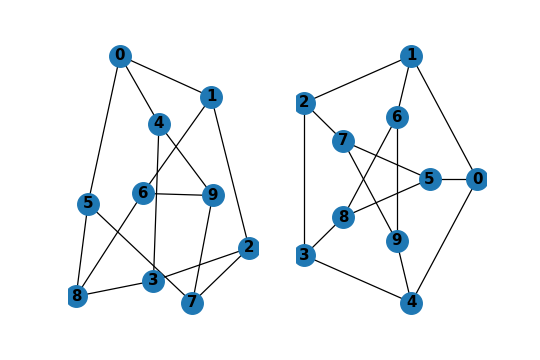

In [124]:
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

<IPython.core.display.Javascript object>


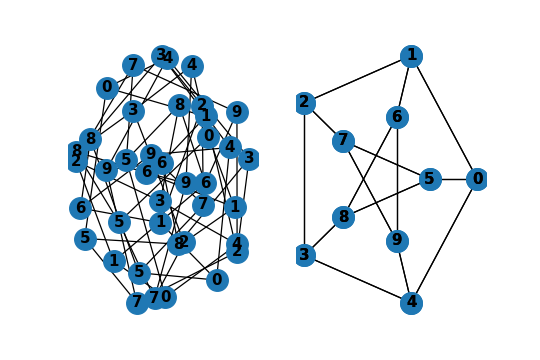

In [118]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)

nx.draw_random(G, **options)
plt.subplot(222)

nx.draw_circular(G, **options)
plt.subplot(223)

nx.draw_spectral(G, **options)
plt.subplot(224)

nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

<IPython.core.display.Javascript object>


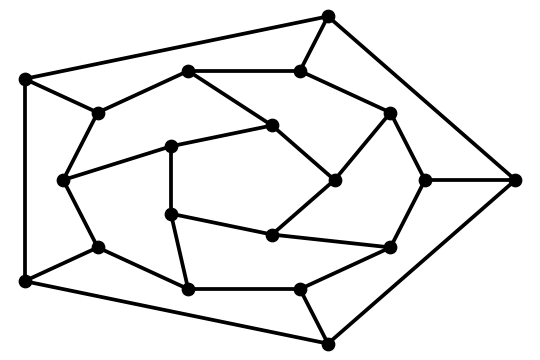

In [128]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

例如，要将图形保存到文件中，请使用

<IPython.core.display.Javascript object>


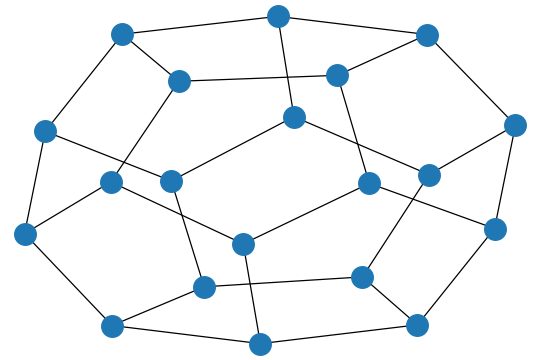

In [129]:
nx.draw(G)
plt.savefig("path.png")

写入文件 `path.png` 在本地目录中。如果系统上有`graphviz和pygraphviz`或`pydot`，您也可以使用 `nx_agraph.graphviz_layout(G)` 或 `nx_pydot.graphviz_layout(G)` 以获取节点位置，或以点格式写入图形以进行进一步处理。

In [25]:
def plot_graph(G, weight_name=None):
    import matplotlib.pyplot as plt

    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None

    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

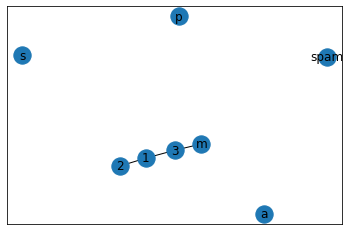

In [27]:
plot_graph(G)

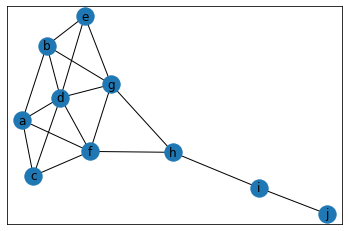

In [41]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g'], type = 'machine')
G.add_nodes_from(['h', 'i', 'j'], type = 'human')
G.add_edges_from([('a', 'c'), ('a', 'b'), ('a', 'd'), ('a', 'f'), ('b', 'd'), ('b', 'e'), ('b', 'g'), ('c', 'f'), ('c', 'd'), ('d', 'f'), ('d', 'e'), ('d', 'g'), ('e', 'g'), ('f', 'g'), ('f', 'h'), ('g', 'h'), ('h', 'i'), ('i', 'j')])

def plot_graph(G, weight_name=None):
    import matplotlib.pyplot as plt

    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None

    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

plot_graph(G, weight_name=None)
plt.savefig('example.png')
plt.show()

In [39]:
nx.spring_layout(G)

{'a': array([ 0.39818573, -0.35231847]),
 'b': array([ 0.10072169, -0.51045381]),
 'c': array([ 0.49947249, -0.13615918]),
 'd': array([ 0.17612369, -0.29575785]),
 'e': array([-0.13607716, -0.47407253]),
 'f': array([ 0.19754103, -0.01912054]),
 'g': array([-0.06701426, -0.16305702]),
 'h': array([-0.14433199,  0.26790836]),
 'i': array([-0.40789631,  0.68303103]),
 'j': array([-0.61672493,  1.        ])}

In [3]:
from networkx.algorithms import bipartite
G = nx.complete_bipartite_graph(3,2)
X=set([0,1,2])
bipartite.density(G,X)



1.0

In [10]:
Y=set([10])
bipartite.density(G,Y)

1.5

<IPython.core.display.Javascript object>


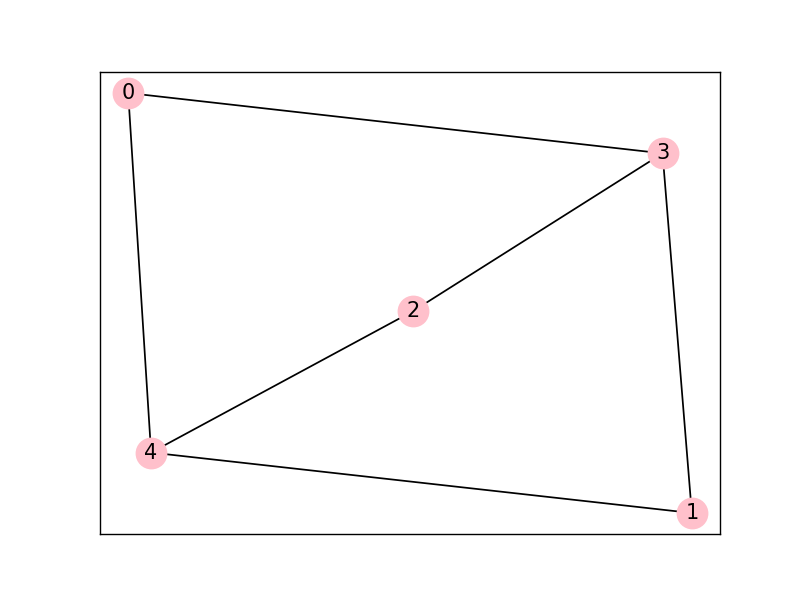

In [7]:
nx.draw_networkx(G,node_color='pink')

In [11]:
G = nx.path_graph(4)
r = nx.degree_assortativity_coefficient(G)
print("%3.1f"%r)


-0.5


<IPython.core.display.Javascript object>


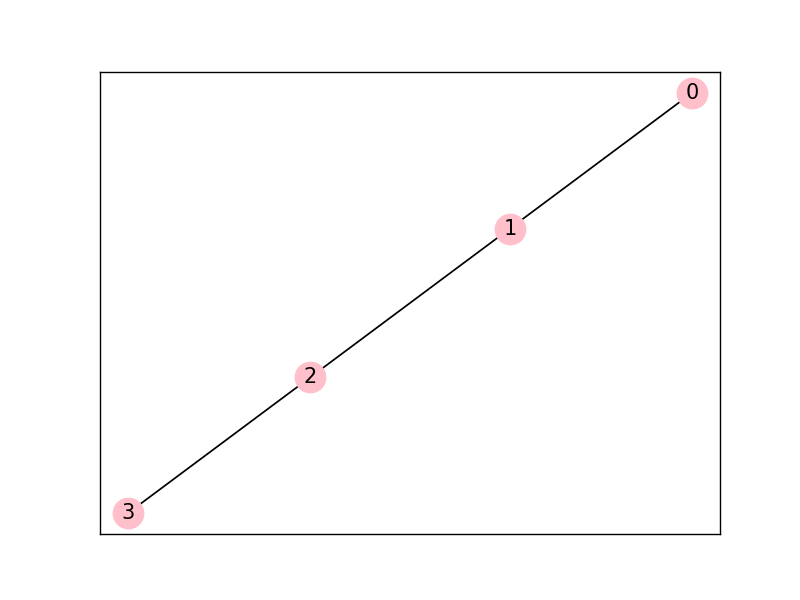

In [12]:
nx.draw_networkx(G,node_color='pink')

In [16]:
nx.average_neighbor_degree(G,source ='in',target ='in')

{0: 2.0, 1: 1.5, 2: 1.5, 3: 2.0}

In [14]:
print(dict(G.degree(weight='weight')))

{0: 1, 1: 2, 2: 2, 3: 1}


In [17]:
nx.average_shortest_path_length(G)

1.6666666666666667